### Q2

(a) By definition we can derive the estimates of value functions as follow:
$$
Q_1 = (1, 0, 0, 0)\\
Q_2 = (1, 1, 0, 0)\\
Q_3 = (1, 1.5, 0, 0)\\
Q_4 = (1, \frac{5}{3}, 0, 0)\\
$$

So at time $2$ and $5$, the optimal exploitation choice of action should be action $1$ and $2$, but the agent chose action $2$ and $3$. Hence at time steps $2$ and $5$, the exploration definitely occurred. On all the other steps the exploration could possibly have occurred, as one can not tell whether the action was chosen randomly or not.

(b) As action $a$ occurs, we have $\mathbb{1}_{A_t = a} = 1$ and thus $N_{t+1}(a) = N_{t}(a) + 1$. \\
Then by definition:
$$
\begin{aligned}
Q_{t+1}(a) 
&=\frac{\sum_1^t R_i \mathbb{1}_{A_i=a}}{N_{t+1}(a)} \\
&=\frac{\sum_1^{t-1} R_i \mathbb{1}_{A_i=a} + R_t}{N_{t}(a)} \frac{N_t(a)}{N_{t+1}(a)}  \\
&= Q_t(a)\frac{N_t(a)}{N_{t+1}(a)} + R_t \frac{1}{N_{t+1}(a)} \\
&= Q_t(a)[1 - \frac{1}{N_{t+1}(a)}] + R_t \frac{1}{N_{t+1}(a)} \\
&= Q_t(a) + \alpha_t(a)[R_t-Q_t(a)]
\end{aligned}
$$

(d) Consider there are two actions $a$ and $b$, $\sigma$ denotes the sigomid function, then
$$
\begin{aligned}
P[A_t = a] 
&= \frac{e^{H_t(a)}}{e^{H_t(a)}+e^{H_t(b)}} \\
&= \frac{1}{1 + e^{H_t(b) - H_t(a)}} \\
&= \sigma(H_t(a) - H_t(b))
\end{aligned}
$$
Similarly
$$
P[A_t = b] =  \sigma(H_t(b) - H_t(a))
$$
$$

#### (e) Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


1. $\epsilon=0$ with an optimistic initial value $Q_0 = 5$

In [2]:
eps = 0

reward_all = np.zeros((2000, 1000))
optimal_action_all = np.zeros((2000, 1000))
for game in range(2000):
    value_true = np.random.normal(0, 1, 10)
    best_action = np.argmax(value_true)
    
    value_est = np.zeros(10) + 5  # Optimistic initial value = 5
    action_count = np.zeros(10)

    for step in range(1000):
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            max_value = np.max(value_est)  # Greedy
            action = np.random.choice([i for i in range(10) if value_est[i] == max_value])
        
        # Optimal action?
        if action == best_action: optimal_action_all[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)
        reward_all[game, step] = reward

        # Update
        action_count[action] += 1    
        value_est[action] = (1 - 1 / action_count[action]) * value_est[action] + reward / action_count[action]
    
    if (game + 1) % 400 == 0: print("Game", game + 1,  "Done!")


Game 400 Done!
Game 800 Done!
Game 1200 Done!
Game 1600 Done!
Game 2000 Done!


2. $\epsilon=0.1$ greedy strategy with UCB

In [3]:
eps = 0.1

reward_all_1 = np.zeros((2000, 1000))
optimal_action_all_1 = np.zeros((2000, 1000))
for game in range(2000):
    value_true = np.random.normal(0, 1, 10)
    best_action = np.argmax(value_true)
    
    value_est = np.zeros(10)
    action_count = np.zeros(10)

    for step in range(1000):
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            confidence = np.array([2 * np.sqrt(np.log(step + 1) / max(n, 1)) for n in action_count])
            
            action = np.argmax(value_est + confidence)  # Greedy
        
        # Optimal action?
        if action == best_action: optimal_action_all_1[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)
        reward_all_1[game, step] = reward

        # Update
        action_count[action] += 1    
        value_est[action] = (1 - 1 / action_count[action]) * value_est[action] + reward / action_count[action]
    
    if (game + 1) % 400 == 0: print("Game", game + 1,  "Done!")


Game 400 Done!
Game 800 Done!
Game 1200 Done!
Game 1600 Done!
Game 2000 Done!


3. $\epsilon=0.01$ greedy strategy with UCB

In [4]:
eps = 0.01

reward_all_2 = np.zeros((2000, 1000))
optimal_action_all_2 = np.zeros((2000, 1000))
for game in range(2000):
    value_true = np.random.normal(0, 1, 10)
    best_action = np.argmax(value_true)
    
    value_est = np.zeros(10)
    action_count = np.zeros(10)

    for step in range(1000):
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            confidence = np.array([2 * np.sqrt(np.log(step + 1) / max(n, 1)) for n in action_count])
            
            action = np.argmax(value_est + confidence)  # Greedy
        
        # Optimal action?
        if action == best_action: optimal_action_all_2[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)
        reward_all_2[game, step] = reward

        # Update
        action_count[action] += 1    
        value_est[action] = (1 - 1 / action_count[action]) * value_est[action] + reward / action_count[action]
    
    if (game + 1) % 400 == 0: print("Game", game + 1,  "Done!")


Game 400 Done!
Game 800 Done!
Game 1200 Done!
Game 1600 Done!
Game 2000 Done!


<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/var/folders/cb/0qjpmgyd53q970hhrqhbcvhr0000gn/T/ipykernel_25622/1304409174.py:2: SyntaxWarning: invalid escape sequence '\e'
  ax[0].plot(reward_all.mean(axis=0), color='purple', label='$\epsilon = 0$ opt. initial', lw=0.85)
/var/folders/cb/0qjpmgyd53q970hhrqhbcvhr0000gn/T/ipykernel_25622/1304409174.py:3: SyntaxWarning: invalid escape sequence '\e'
  ax[0].plot(reward_all_1.mean(axis=0), co

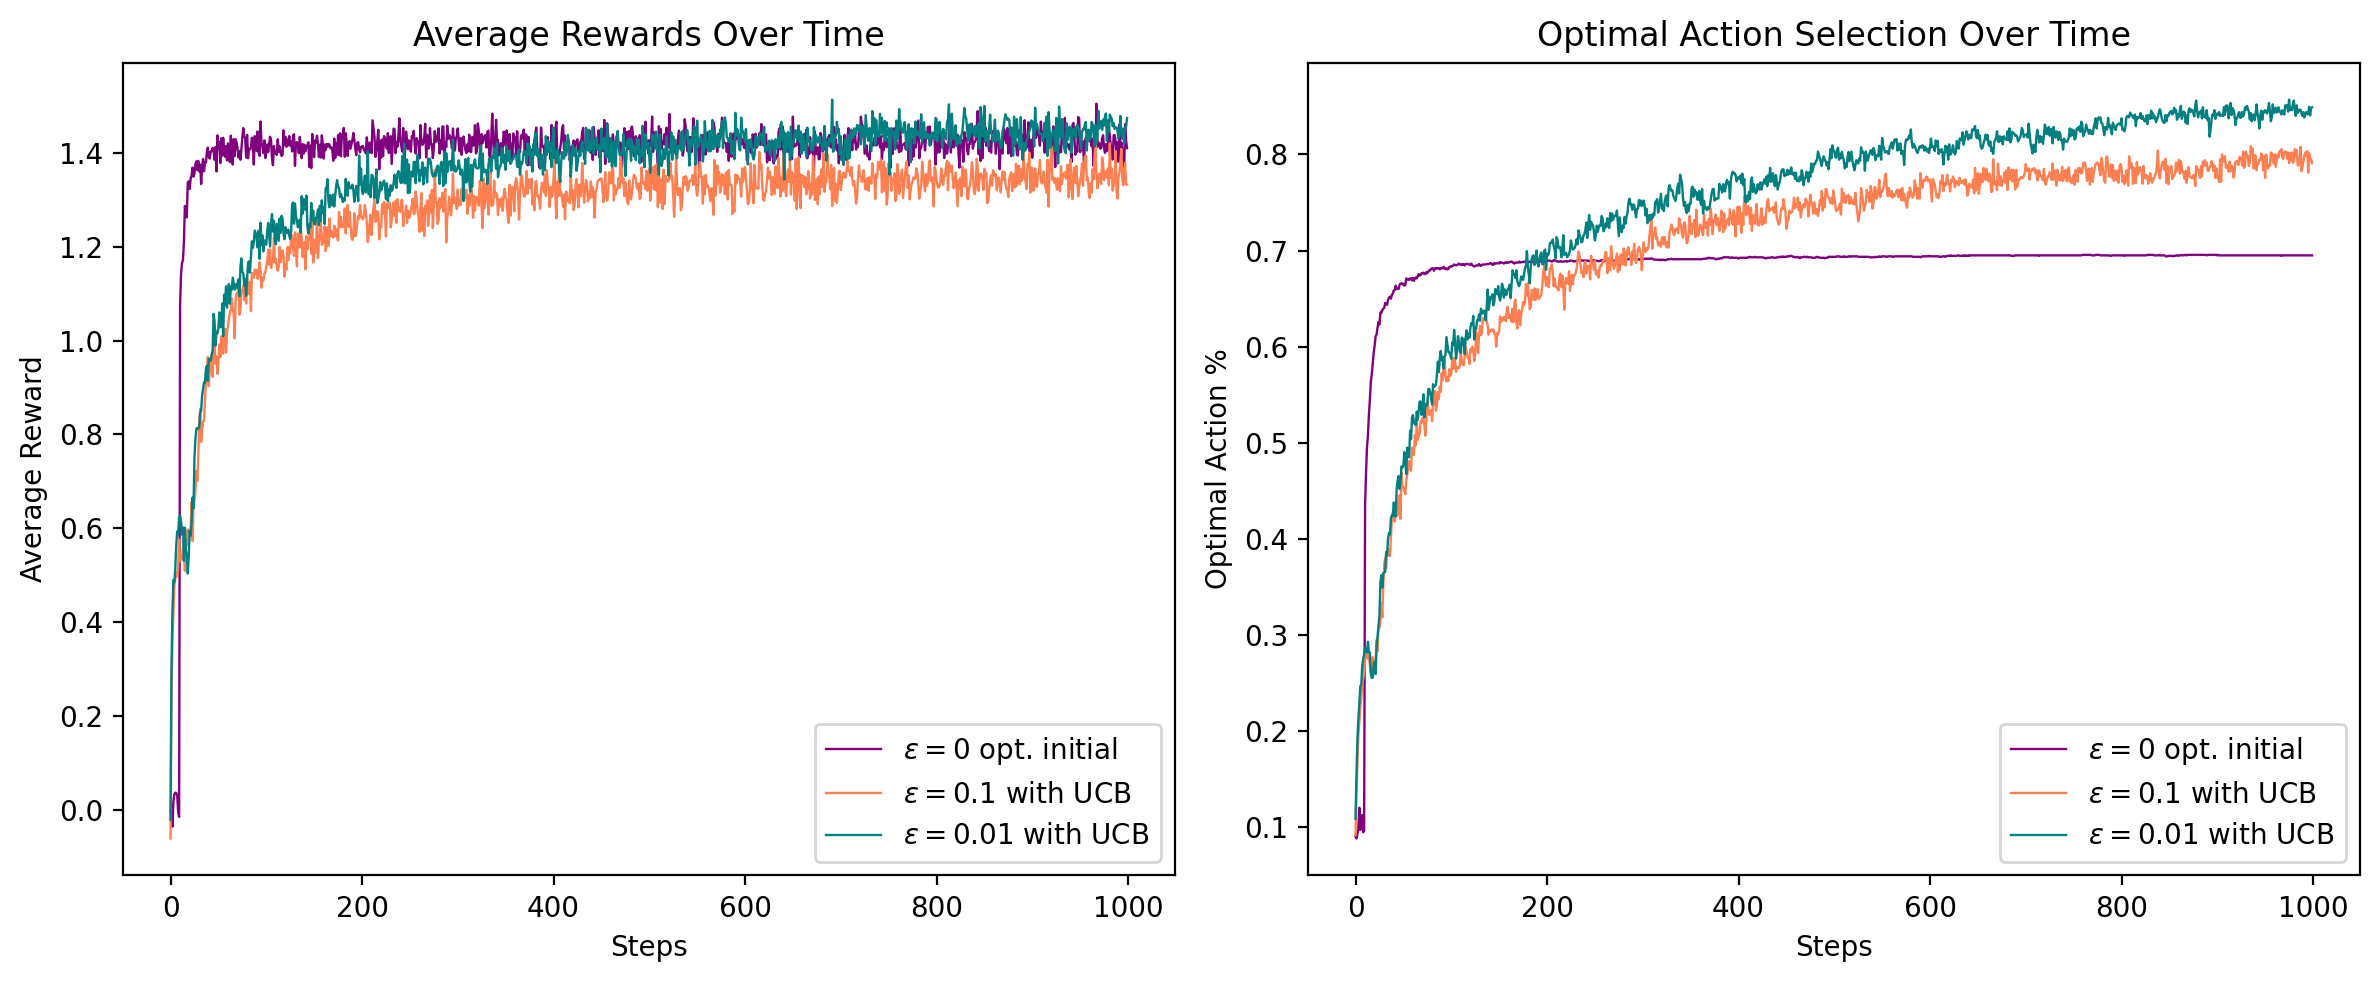

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(reward_all.mean(axis=0), color='purple', label='$\epsilon = 0$ opt. initial', lw=0.85)
ax[0].plot(reward_all_1.mean(axis=0), color='coral', label='$\epsilon=0.1$ with UCB', lw=0.85)
ax[0].plot(reward_all_2.mean(axis=0), color='teal', label='$\epsilon=0.01$ with UCB', lw=0.85)
ax[0].set_title("Average Rewards Over Time")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

ax[1].plot(optimal_action_all.mean(axis=0), color='purple', label='$\epsilon = 0$ opt. initial', lw=0.85)
ax[1].plot(optimal_action_all_1.mean(axis=0), color='coral', label='$\epsilon=0.1$ with UCB', lw=0.85)
ax[1].plot(optimal_action_all_2.mean(axis=0), color='teal', label='$\epsilon=0.01$ with UCB', lw=0.85)
ax[1].set_title("Optimal Action Selection Over Time")  # Title for the second subplot
ax[1].set_xlabel("Steps")  # X-axis label for the second subplot
ax[1].set_ylabel("Optimal Action %") 
ax[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
fig.savefig("Q2-e.png", dpi=400)

Between the two UCB-greedy strategies, it is clear that the one with $\epsilon=0.01$ perform better than the one with $\epsilon=0.1$, in the sense of both average rewards and optimal action selection percentage. This is because under a stationary environment once the value function is learned after several rounds, exploration move actually lowers down the performance of the agent. This explains why the optimal action selection percentage curve of the two strategies are very close at the start, then diverge after around 100 steps.

For $\epsilon=0$ strategy with optimistic initial value, it stops learning after the initial values are driven down through rounds of learning. Although this avoids the issue mentioned above - no exploration improves its average rewards, the optimal action selection percentage remains lower than the two other strategies above. The learning finally stagnated with a suboptimal strategy. This is also why this curve is not noisy compared to the other two. However, on the other hand, due to this nature of its learning, the initial speed of learning was very fast - seen from both plots, which gives an advantage of this algorithm.

#### (f) Coding

1. Sample Averages

In [6]:
eps= 0.1

optimal_action_all_3 = np.zeros((1000, 10000))
for game in range(1000):
    value_true = np.zeros(10)  # Value starts equal
    
    value_est = np.zeros(10)
    action_count = np.zeros(10)

    for step in range(10000):
        # Update value function
        if step != 0:
            value_true += np.random.normal(0, 0.01, 10)  # Random walk update of true values
        best_action = np.argmax(value_true)
        
        # Select action
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            action = np.argmax(value_est)
        
        # Optimal action?
        if action == best_action: optimal_action_all_3[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)

        # Update
        action_count[action] += 1
        alpha = 1 / action_count[action]
        value_est[action] = (1 - alpha) * value_est[action] + reward * alpha
    
    if (game + 1) % 250 == 0: print("Game", game + 1,  "Done!")


Game 250 Done!
Game 500 Done!
Game 750 Done!
Game 1000 Done!


2. Fixed $\alpha = 0.1$

In [7]:
eps, alpha = 0.1, 0.1

optimal_action_all_4 = np.zeros((1000, 10000))
for game in range(1000):
    value_true = np.zeros(10)  # Value starts equal
    
    value_est = np.zeros(10) # Optimistic initial value = 5
    action_count = np.zeros(10)

    for step in range(10000):
        # Update value function
        if step != 0:
            value_true += np.random.normal(0, 0.01, 10)  # Random walk update of true values
        best_action = np.argmax(value_true)
        
        # Select action
        if np.random.random() < eps:  # Exploration
            action = np.random.choice(range(10))
        else:
            action = np.argmax(value_est)
        
        # Optimal action?
        if action == best_action: optimal_action_all_4[game, step] = 1

        # Reward
        reward = np.random.normal(value_true[action], 1)

        # Update
        action_count[action] += 1    
        value_est[action] = (1 - alpha) * value_est[action] + reward * alpha
    
    if (game + 1) % 250 == 0: print("Game", game + 1,  "Done!")


Game 250 Done!
Game 500 Done!
Game 750 Done!
Game 1000 Done!


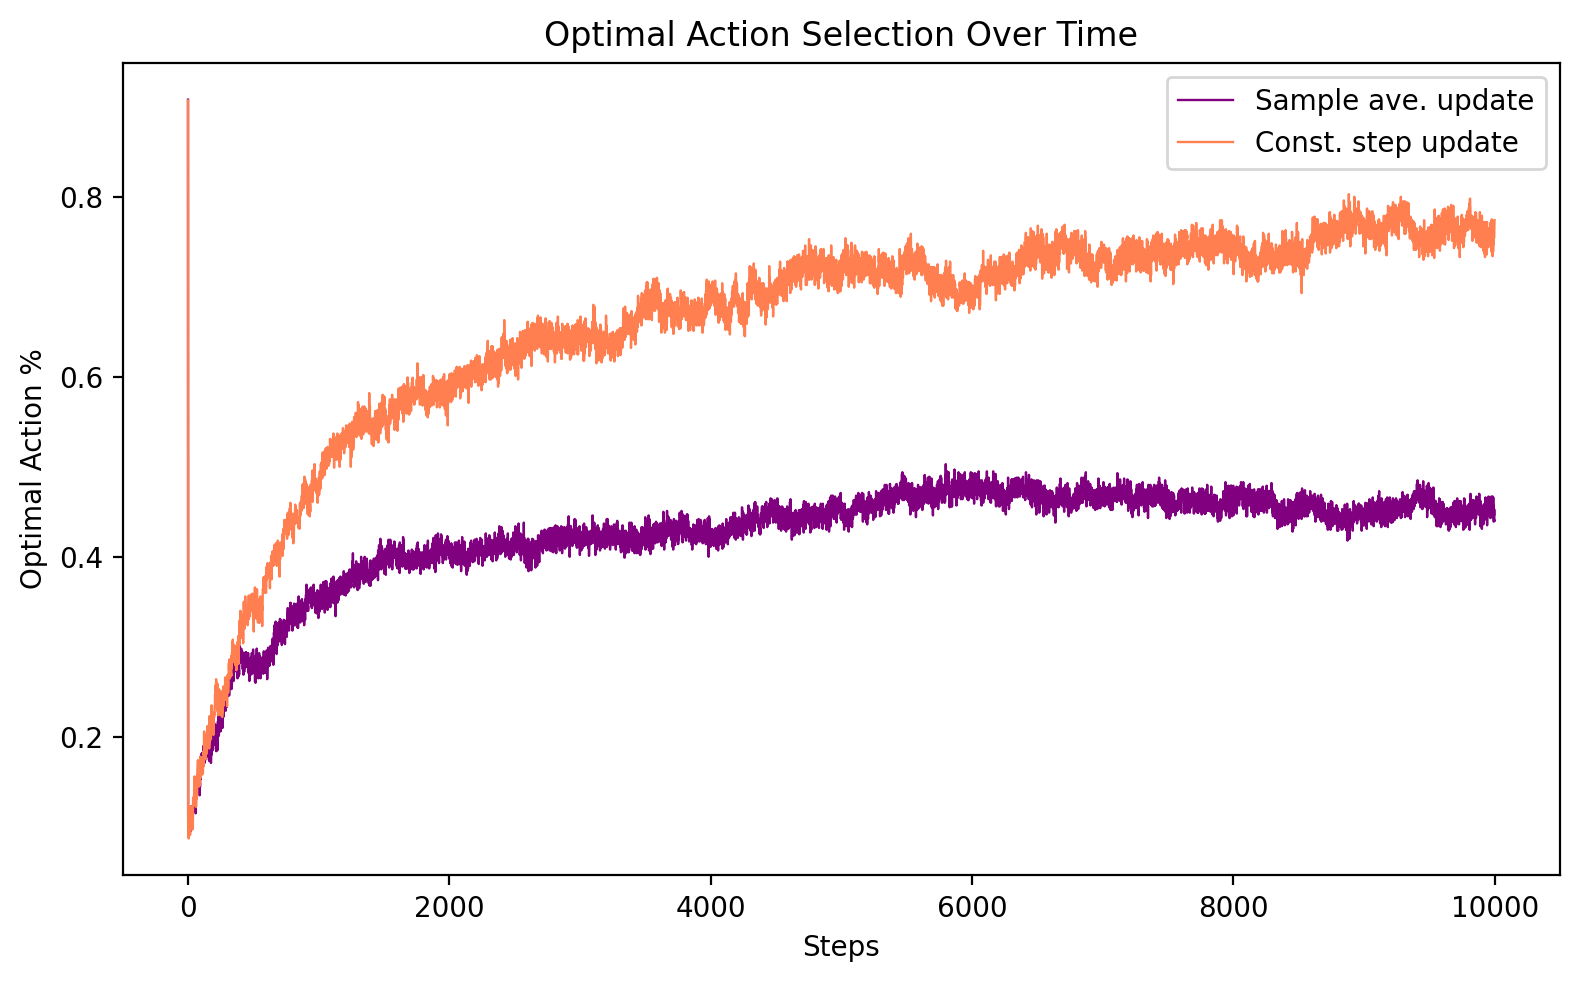

In [8]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.plot(optimal_action_all_3.mean(axis=0), color='purple', label='Sample ave. update', lw=0.85)
ax.plot(optimal_action_all_4.mean(axis=0), color='coral', label='Const. step update', lw=0.85)
ax.set_title("Optimal Action Selection Over Time")  # Title for the second subplot
ax.set_xlabel("Steps")  # X-axis label for the second subplot
ax.set_ylabel("Optimal Action %") 
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
fig.savefig("Q2-f.png", dpi=400)

First comparing to the plots in question (e), one can see the improving of optimal selection is much slower. This is because of the non-stationary environment. 

Between the two strategies, the one with a constant step-size parameter performs better than the one updates value functions with sample averages. This is because the sample average method yields a step-size $\frac{1}{N_t(a)}$, which decreases the more we have encountered an action. This does not work well under non-stationary setting as the previous experience might not be relevant. A constant parameter ensures its learning as the new experience arises, resulting in a better chance of choosing an optimal strategy.